<a href="https://colab.research.google.com/github/JayeshDabholkar/Buisness_Case_Aerofit/blob/main/Buisness_Case_Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### **Descriptive Analysis**

In [5]:
# Display column names
print(df.columns)

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [6]:
# Display data types
print(df.dtypes)

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [7]:
# Display summary statistics
print(df.describe())

              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


In [8]:
#Count of customers by product
product_counts = df['Product'].value_counts()
print(product_counts)

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


In [9]:
#Average ratings by product
average_income = df.groupby('Product')['Income'].mean()
print(average_income)

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64


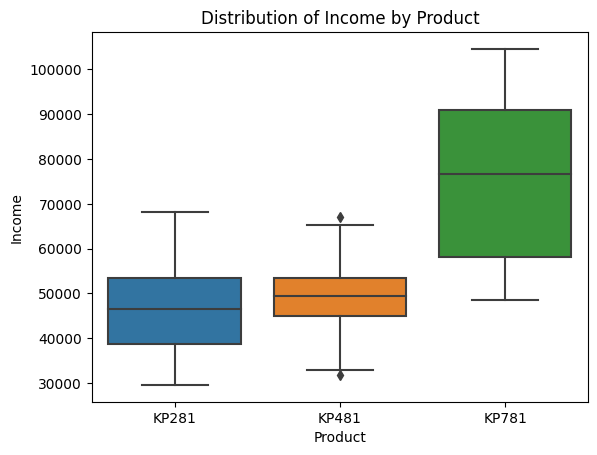

In [10]:
# Distribution of incomes by product
sns.boxplot(data=df, x='Product', y='Income')
plt.title('Distribution of Income by Product')
plt.show()

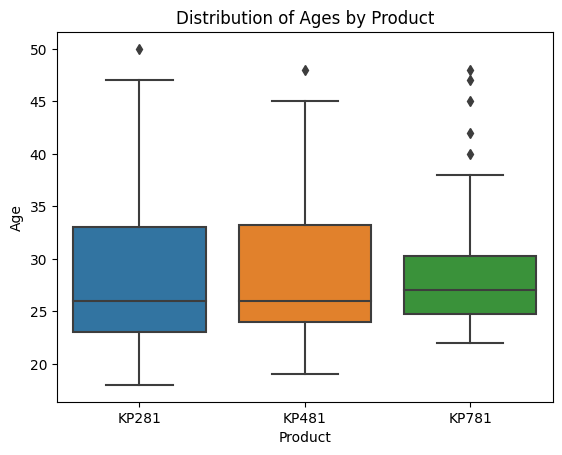

In [11]:
# Distribution of ages by product
sns.boxplot(data=df, x='Product', y='Age')
plt.title('Distribution of Ages by Product')
plt.show()

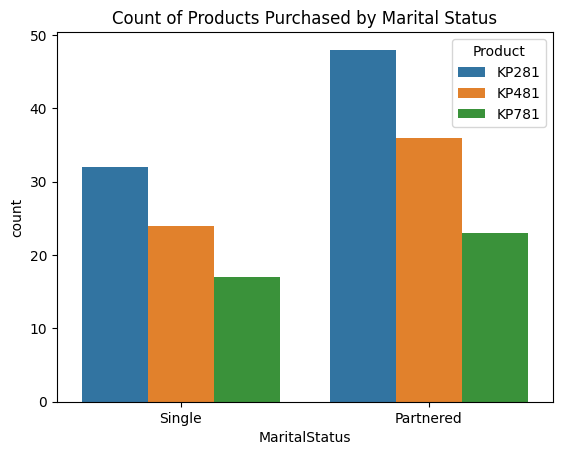

In [12]:
#marital status have any effect on the product purchased
sns.countplot(data=df, x='MaritalStatus', hue='Product')
plt.title('Count of Products Purchased by Marital Status')
plt.show()

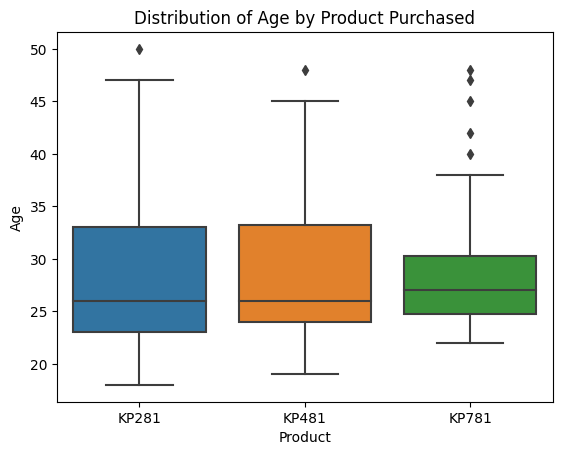

In [13]:
sns.boxplot(data=df, x='Product', y='Age')
plt.title('Distribution of Age by Product Purchased')
plt.show()

In [14]:
product_crosstab = pd.crosstab(index=df['Product'], columns='count')
print(product_crosstab)

col_0    count
Product       
KP281       80
KP481       60
KP781       40


In [15]:
# Calculate marginal probability for percent of customers have purchased KP281, KP481, or KP781 in a table
total_customers = df.shape[0]
marginal_prob = product_crosstab / total_customers * 100
print(marginal_prob)

col_0        count
Product           
KP281    44.444444
KP481    33.333333
KP781    22.222222


### **1. Defining Problem Statement and Analysing basic metrics**

In order to develop potential marketing tactics and product enhancements, the objective is to comprehend the client profile and purchasing behaviour for AeroFit treadmills.

In [16]:
# Check if there are any missing values in the dataset
missing_val = df.isnull().sum()
print(missing_val)

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


In [17]:
# Analyze the correlation between numerical features
correlation_matrix = df.corr()
print(correlation_matrix)

                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000


<ipython-input-17-c74957bcaadb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary

In [18]:
# shape of data
print("Shape of the dataset:", df.shape)

Shape of the dataset: (180, 9)


In [19]:
# data types of all the attribute
print("Data types of attributes:")
print(df.dtypes)

Data types of attributes:
Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


In [20]:
# conversion of categorical attributes to 'category'

# below are some coulumns that has categorical attributes
categorical_attributes = ['Gender', 'MaritalStatus', 'Product']

# convert categorical attributes to 'category' type
df[categorical_attributes] = df[categorical_attributes].astype('category')

# checking the revised data types

print(df.dtypes)

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object


In [21]:
# statistical summary
print(df.describe())

              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


### **2. Non-Graphical Analysis: Value counts and unique attributes**

In [22]:
product_counts = df['Product'].value_counts()
product_counts
unique_product = df['Product'].unique()
unique_product

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [23]:
gender_counts = df['Gender'].value_counts()
gender_counts
unique_gender = df['Gender'].unique()
unique_gender

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [24]:
maritalstatus_counts = df['MaritalStatus'].value_counts()
maritalstatus_counts
unique_maritalstatus = df['MaritalStatus'].unique()
unique_maritalstatus

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [25]:
age_counts = df['Age'].value_counts()
print(age_counts)
unique_age = df['Age'].unique()
print(unique_age)

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]


### **3. Visual Analysis - Univariate & Bivariate**

### 1. For continuous variable(s): Distplot, countplot, histogram for univariate analysis

<ipython-input-59-009c4edf8b20>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde = True, bins = 10)
<ipython-input-59-009c4edf8b20>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Education'], kde = True, bins = 10)
<ipython-input-59-009c4edf8b20>:11: UserWarning: 

`distplot

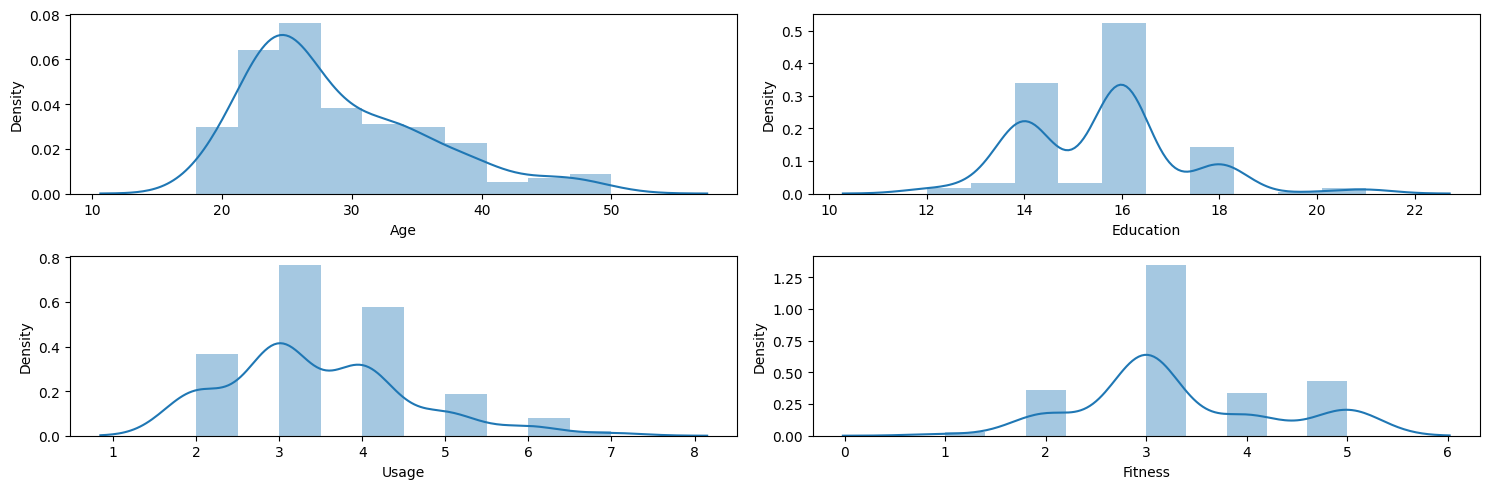

In [59]:
# continuous_variables = ['Age', 'Education', 'Usage', 'Fitness']

# Distplot

plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.distplot(df['Age'], kde = True, bins = 10)
plt.subplot(2,2,2)
sns.distplot(df['Education'], kde = True, bins = 10)
plt.subplot(2,2,3)
sns.distplot(df['Usage'], kde = True, bins = 10)
plt.subplot(2,2,4)
sns.distplot(df['Fitness'], kde = True, bins = 10)

plt.tight_layout()
plt.show()


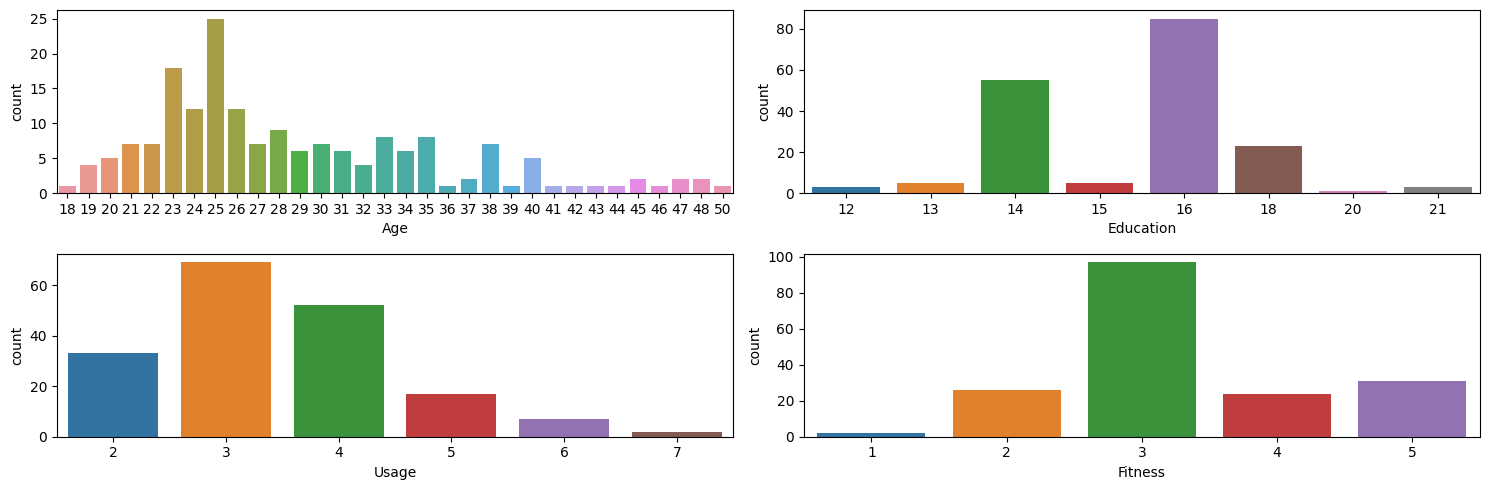

In [56]:
# Countplot

plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'Age')
plt.subplot(2,2,2)
sns.countplot(data = df, x = 'Education')
plt.subplot(2,2,3)
sns.countplot(data = df, x = 'Usage')
plt.subplot(2,2,4)
sns.countplot(data = df, x = 'Fitness')

plt.tight_layout()
plt.show()

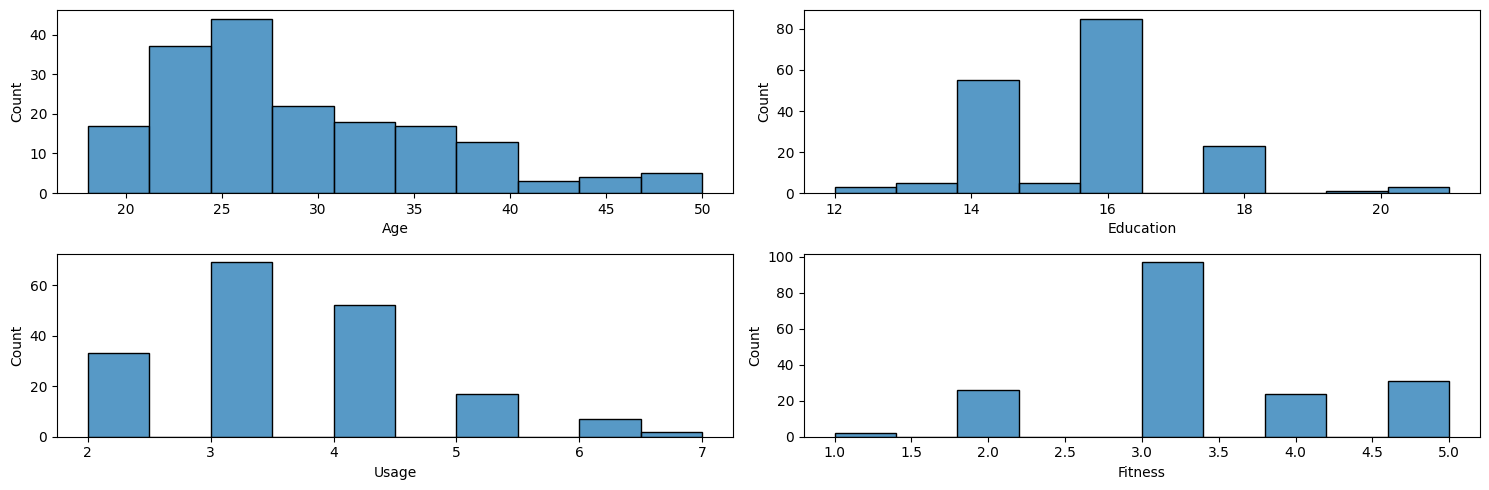

In [57]:
# Histogram
plt.figure(figsize = (15, 5))
plt.subplot(2,2,1)
sns.histplot(data=df,x="Age",bins=10)
plt.subplot(2,2,2)
sns.histplot(data=df,x="Education",bins=10)
plt.subplot(2,2,3)
sns.histplot(data=df,x="Usage",bins=10)
plt.subplot(2,2,4)
sns.histplot(data=df,x="Fitness",bins=10)

plt.tight_layout()
plt.show()

### **2. For categorical variable(s): Boxplot**

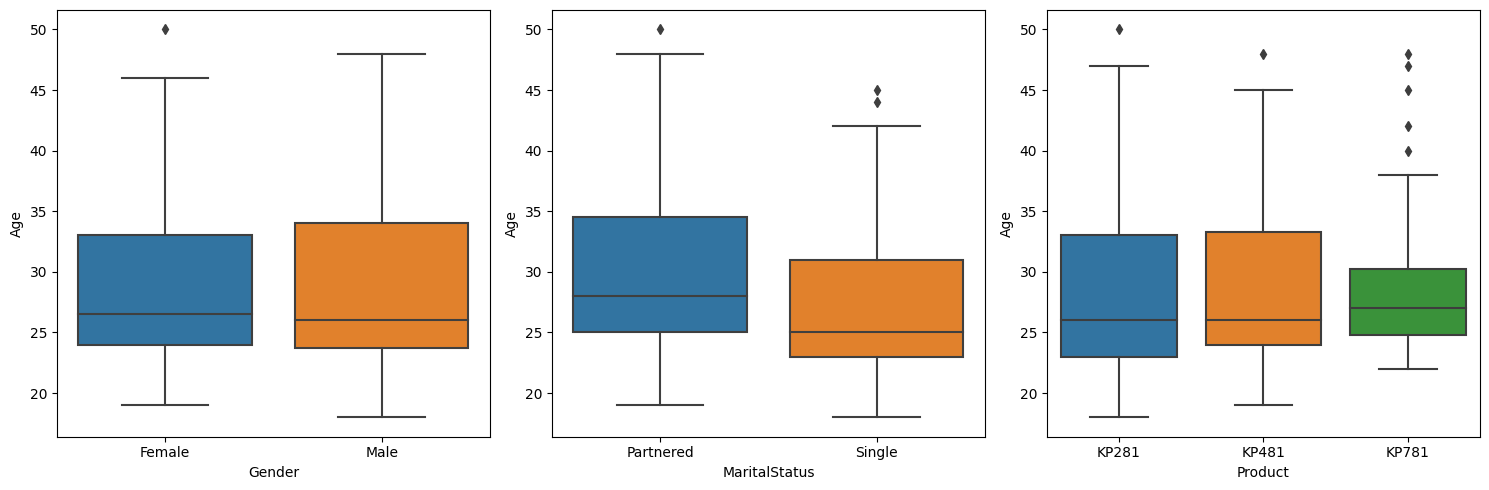

In [62]:
# categorical_variables = ['Gender', 'MaritalStatus', 'Product']

# Boxplot

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data = df, x= 'Gender', y = 'Age')
plt.subplot(1,3,2)
sns.boxplot(data = df, x= 'MaritalStatus', y = 'Age')
plt.subplot(1,3,3)
sns.boxplot(data = df, x= 'Product', y = 'Age')


plt.tight_layout()
plt.show()

### **3. For correlation: Heatmaps, Pairplots**

<ipython-input-65-6f2eb78cce22>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm')


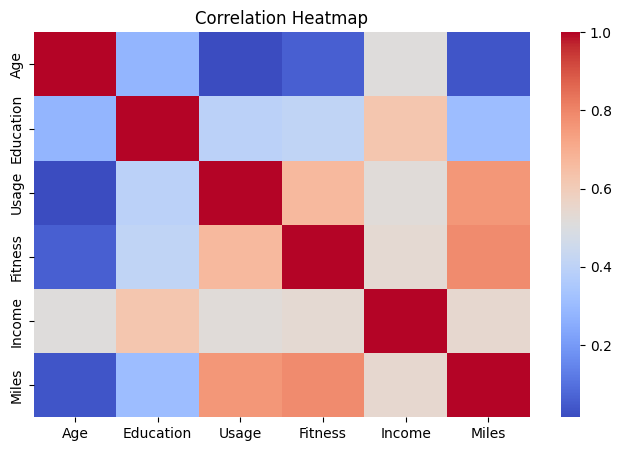

In [65]:
# Plot the correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

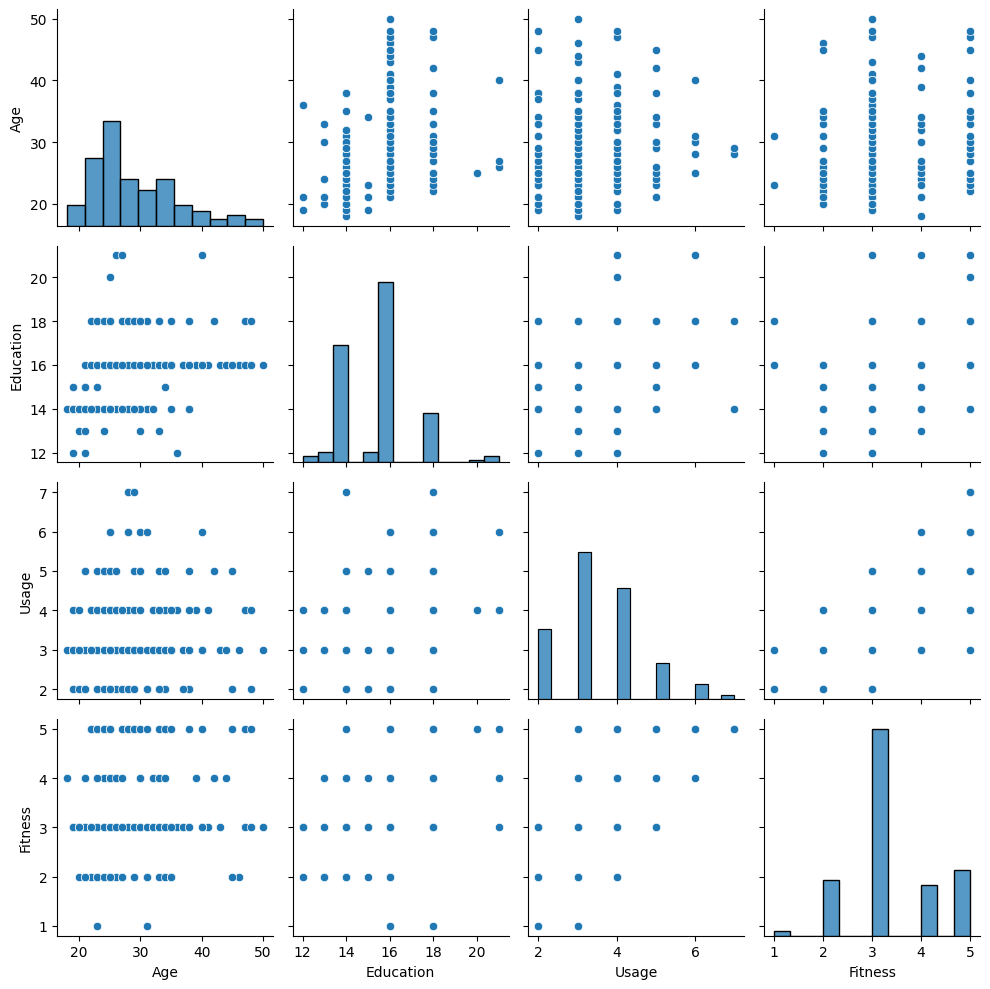

In [69]:
# Select the variables for pairplot analysis
variables = ['Age', 'Education', 'Usage', 'Fitness']

# Create the pairplot
sns.pairplot(data=df[variables])
plt.tight_layout()
plt.show()

### **4. Missing Value & Outlier Detection**

In [70]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


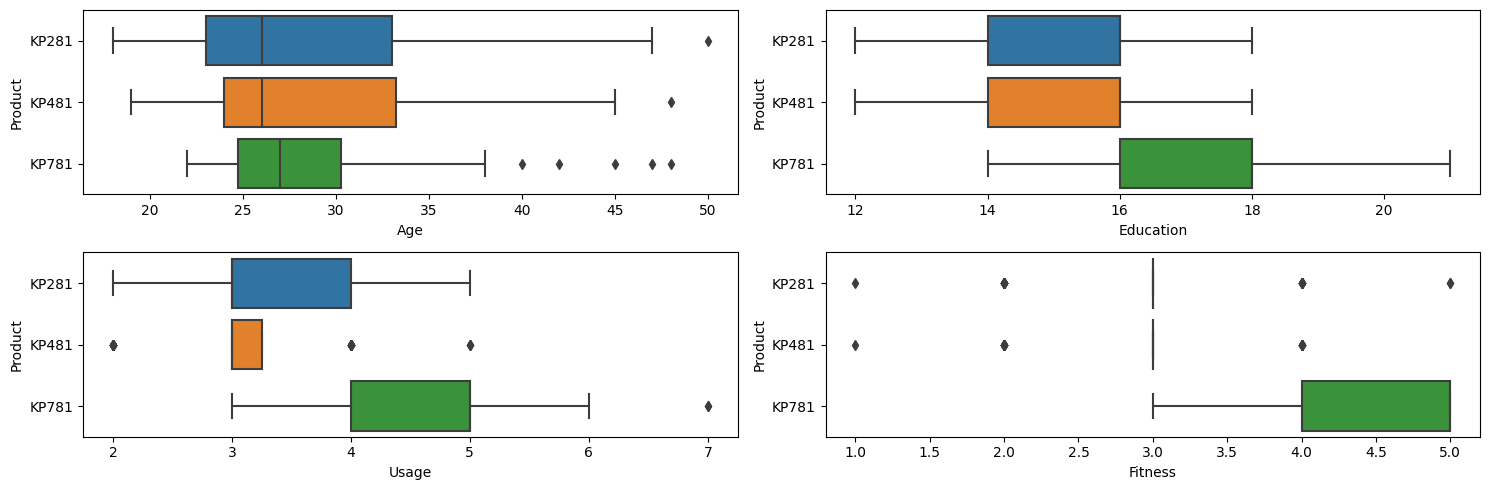

In [73]:
# detect outliers

# continuous_variables = ['Age', 'Education', 'Usage', 'Fitness']

# Create boxplots to visualize outliers
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.boxplot(data = df, x= 'Age', y = 'Product')
plt.subplot(2,2,2)
sns.boxplot(data = df, x= 'Education', y = 'Product')
plt.subplot(2,2,3)
sns.boxplot(data = df, x= 'Usage', y = 'Product')
plt.subplot(2,2,4)
sns.boxplot(data = df, x= 'Fitness', y = 'Product')

plt.tight_layout()
plt.show()

### **5. Business Insights based on Non-Graphical and Visual Analysis**

We may derive various business insights from the variety of attributes in the AeroFit treadmill dataset using non-graphical and visual analysis.


**1. Comments on the range of attributes**

i. Age Range - As per data received from aerofit, after visualising we can say that the age group of 20-30 is utilising our products the most. Targeting this age groups with marketing campaigns can benefit from this information.

ii. Education Range - It reflects the variation in the educational background of customers. Knowing the educational spectrum can also provide you an idea of the target audience's prospective knowledge level.

iii. Usage Range - Understanding consumer behaviour and creating tactics for client engagement and retention can both benefit from this information. Our consumers use the products 3-4 times a week at most, thus some imporovment should be done to make it 5-6 in a week.

iv. Fitness Range - This insight can guide decisions related to product positioning, such as highlighting specific features or programs that cater to different fitness levels. Understanding the fitness range can also inform decisions regarding product recommendations or customization options.

**2. Comments on the distribution of the variables and relationship between them**

i. Age Distribution : Information about the treadmill's intended market is provided by the age distribution. Businesses can determine which age groups are most interested in buying treadmills by looking at the distribution.

ii. Education Level Distribution : Businesses can adjust their educational and communication products to meet the needs and desires of various client segments by taking into account the distribution of education levels.

iii. Fitness Level Distribution : This knowledge can be helpful in creating customised training regimens, workout routines, or fitness programmes that are appropriate for people of varied fitness levels.

iv. Relationships between Variables : Examining the link between age and fitness level may show patterns such as younger customers prioritising fitness maintenance while older customers emphasise fitness improvement. These insights can help with customer segmentation, product creation, and marketing tactics.

 **3. Comments for each univariate and bivariate plot**

 **Univariate Analysis:**

 i. Distplot (Continuous Variables): A distplot shows how continuous variables like age, education, usage, and fitness are distributed. It aids in determining the distribution's shape (such as normal or skewed), as well as the existence of outliers.

 ii. Countplot (Categorical Variables): The countplot shows how frequently categorical variables like gender, marital status, and product purchased appear in each category.

 iii. Histogram (Continuous Variables): It helps identify the underlying pattern, skewness, and outliers in the data

**Bivariate Analysis:**

i. Boxplot (category Variables): In a boxplot, a continuous variable's distribution over various categories of a category variable is shown. It aids in the visualisation of each category's main trend, distribution, and outliers.

**Correlation Analysis:**

i. Heatmap: The heatmap employs colour coding to show the correlations' intensity and direction. Businesses can better comprehend the interdependencies and potential predictors within the dataset with the aid of heatmaps, which aid in identifying links and patterns between variables.


ii. Pairplot: This graph shows scatterplots for all possible combinations of the dataset's variables.] Pairplots can shed light on the overall structure of the dataset and are beneficial for preliminary examination of variable interactions.

### **6. Recommendations**

Based on the analysis of the AeroFit treadmill dataset. Below are some recommendation which can improve their product sales and profits.

1. Create experiences or features with a specific audience in mind. Improve the customer experience by investigating the connection between marital status and product purchases to identify potential preferences or requirements of married or single customers.

2. Age, educational, or fitness-related groups of customers might profit from customised promotions. Offer special discounts, incentives, or rewards to promote sales and brand loyalty.

3. 20-30 are the age groups that are most interested in buying treadmills. Create marketing initiatives and product features that are specific to these age groups.

4. provide knowledge about the products such as features or health benefits and optimum utilisation for the same, through social media campaign and events.

5. Analyze the distribution of product purchases to identify popular models such as KP281, KP481, or KP781. Ensure availability and adequate stock of these models to meet customer demand.

6. Improve product recommendations and use this information to suggest relevant accessories, training programs, or complementary products.

7. To maintain competition in the market, keep up with the products and price strategies of competitors. To keep a competitive edge, adjust marketing tactics or product features accordingly.

8. After analysing usage patterns of customers, develope flexible subscription plans or pricing models that leads to improvement in profits and loyalty.